### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection as sms
import sklearn.preprocessing as sp
import sklearn.linear_model as slm
import sklearn.metrics as sm
import sklearn.ensemble as ens
from warnings import filterwarnings 
filterwarnings('ignore') # to ignore warnings
import sklearn.linear_model as slm
from sklearn import svm

### Loading data

In [2]:
#df=pd.read_table("D:\\Data\\Gamboo\\Fruit\\fruit.txt")
df=pd.read_table("fruit.txt")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Preprocessing

In [3]:
df[df.duplicated()]
# no suplicates to remove

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
df['fruit_label'].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
df.drop_duplicates(['fruit_label'])[['fruit_label','fruit_name']]
# here are fruit names and their labels which we will use target featue for classification 

,fruit_label,fruit_name
0,1,apple
3,2,mandarin
24,3,orange
43,4,lemon


In [7]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


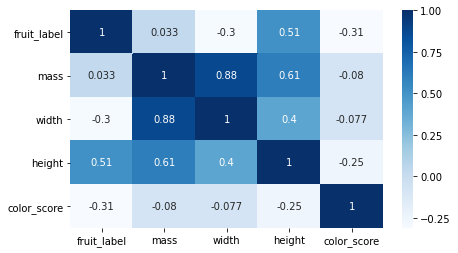

In [8]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

### Splitting data

In [9]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

**"fruit_subtype"** and **"fruit_name"** are direct indicators of **"fruit_name"**, therefore we can not use them as *input features*

In [10]:
X = df.drop(columns=['fruit_label', 'fruit_name', 'fruit_subtype'])
y = df[['fruit_label']]

In [11]:
x_train, x_test, y_train, y_test = sms.train_test_split(X, y, test_size=0.3, random_state=25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41, 1) (18, 1)


### Modelling

In [12]:
# to merge all scores and metrics results altogether
performance=pd.DataFrame(data=None, index=['BAS','AS'])
performance

""
BAS
AS


In [13]:
# creating function to evaluate model at one run
def evaluate(model,model_name):
    performance[model_name]=[sm.balanced_accuracy_score(y_test, model.predict(x_test)),
    sm.accuracy_score(y_test, model.predict(x_test)) ]
    
    print(sm.classification_report(y_test, model.predict(x_test)))
    print("--------Balanced Accuracy Score--------")
    print(sm.balanced_accuracy_score(y_test, model.predict(x_test)))
    print("-------Accuracy Score------------------")
    print(sm.accuracy_score(y_test, model.predict(x_test)))
    
pd.options.display.float_format = '{:.3f}'.format

#### Logistic regression

We will do **Hyperparameter tuning** to find **otimal best** parameters in some models

In [14]:
parameters = {'penalty':('l1','l2','elastic', 'none'),'C':[1, 10, 50, 100] }
lr1 = slm.LogisticRegression()
clf1 = sms.GridSearchCV(lr1, parameters)
clf1.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 50, 100],
                         'penalty': ('l1', 'l2', 'elastic', 'none')})

In [15]:
evaluate(clf1, 'Log_reg_0.5')

              precision    recall  f1-score   support

           1       0.43      0.75      0.55         4
           2       1.00      1.00      1.00         2
           3       0.80      0.50      0.62         8
           4       1.00      1.00      1.00         4

    accuracy                           0.72        18
   macro avg       0.81      0.81      0.79        18
weighted avg       0.78      0.72      0.73        18

--------Balanced Accuracy Score--------
0.8125
-------Accuracy Score------------------
0.7222222222222222


#### SVC classification model

In [16]:
parameters = {'C':[1, 10, 50, 100] }
svc = svm.SVC()
clf2 = sms.GridSearchCV(svc, parameters)
clf2.fit(x_train, y_train)
clf2.best_params_

{'C': 100}

In [17]:
evaluate(clf2, 'SVC')

              precision    recall  f1-score   support

           1       0.31      1.00      0.47         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         8
           4       0.67      0.50      0.57         4

    accuracy                           0.44        18
   macro avg       0.49      0.62      0.51        18
weighted avg       0.33      0.44      0.34        18

--------Balanced Accuracy Score--------
0.625
-------Accuracy Score------------------
0.4444444444444444


In [18]:
performance[['SVC']]

,SVC
BAS,0.625
AS,0.444


### Ensemble methods

#### RandomForest classification model

In [19]:
parameters = { 'n_estimators':[i for i in range(150,200,10)] }
rfc = ens.RandomForestClassifier(random_state=25)
clf3 = sms.GridSearchCV(rfc, parameters)
clf3.fit(x_train, y_train)

clf3.best_params_

{'n_estimators': 150}

In [20]:
evaluate(clf3, 'R_Forest')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

--------Balanced Accuracy Score--------
1.0
-------Accuracy Score------------------
1.0


In [21]:
performance[['R_Forest']]

,R_Forest
BAS,1.000
AS,1.000


#### ExtraTree classification model

In [22]:
parameters = { 'n_estimators':[i for i in range(80,200,10)] }
etc = ens.ExtraTreesClassifier(random_state=25)
clf4 = sms.GridSearchCV(etc, parameters)
clf4.fit(x_train, y_train)

clf4.best_params_

{'n_estimators': 140}

In [23]:
evaluate(clf4, 'ExTree')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

--------Balanced Accuracy Score--------
1.0
-------Accuracy Score------------------
1.0


#### GradientBoosting classification model

In [24]:
parameters = { 'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,150,200,250] }
gbc = ens.GradientBoostingClassifier(random_state=25)
clf5 = sms.GridSearchCV(gbc, parameters)
clf5.fit(x_train, y_train)

clf5.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [25]:
evaluate(clf5, 'GradientBC')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.89      1.00      0.94         8
           4       1.00      0.75      0.86         4

    accuracy                           0.94        18
   macro avg       0.97      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18

--------Balanced Accuracy Score--------
0.9375
-------Accuracy Score------------------
0.9444444444444444


#### AdaBoost classification model

In [26]:
parameters = { 'learning_rate':[0.1, 1, 2], 'n_estimators':[50,100,150,200]}
abc = ens.AdaBoostClassifier(random_state=25)
clf6 = sms.GridSearchCV(abc, parameters)
clf6.fit(x_train, y_train)

clf6.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [27]:
evaluate(clf6, 'AdaBC')

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         8
           4       1.00      0.50      0.67         4

    accuracy                           0.78        18
   macro avg       0.92      0.75      0.78        18
weighted avg       0.85      0.78      0.76        18

--------Balanced Accuracy Score--------
0.75
-------Accuracy Score------------------
0.7777777777777778


In [28]:
performance

,Log_reg_0.5,SVC,R_Forest,ExTree,GradientBC,AdaBC
BAS,0.812,0.625,1.000,1.000,0.938,0.750
AS,0.722,0.444,1.000,1.000,0.944,0.778


I merged evaluation metrics and scores of all models we trained into **"performance"** in order to make the comparison. So, that can be seen some models performed better like **GradientBoost, RandomForest, ExtraTree** models. Particularly, doing of **hyperparameter tuning** boosted performance on closer optimal values

According to the comparison of models performances, the **Random Forest** is the optimal model to pick and to utilize as the major

## Note
As can be seen, two models performed perfectly with a 100% score. I want to tell that there is not **"Overfitting"** because the accuracy score showed itself on test data. Let us come to the reason, it is unknown exactly but we know **No Overfitting** and **NO Data Leakage**, so it happens probably because of **low volumed data**

**Thanks**